In [116]:
# import libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [117]:
#reading the dataset
data = pd.read_excel("/content/Mpox linelist.xlsx")

In [115]:
data.head()

,Unique Identifier,EPID,Case Number,Date of investigation,Location of investigation,Other location of investigation,Reporting County,Type,Sex,Date of Birth,...,Column16223,Column16224,Column16225,Column16226,Column16227,Column16228,Column16229,Column16230,Column16231,Column16232
0,1752-8210-1852-3423,NaN,NaN,NaT,Unknown,NaN,NaN,Confirmed,Male,1980-12-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1752-6775-5388-7710,KEN-MOM-MVT-13,13,2025-06-12,Health Facility,NaN,Mombasa,Confirmed,Male,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1752-6726-6287-2303,KEN-MOM-MVT-12,12,2025-07-14,Health Facility,NaN,Mombasa,Confirmed,Female,1994-06-04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1752-6688-5452-3481,KEN-BUN-WEBW-001,1,2025-07-14,Health Facility,NaN,Bungoma,Confirmed,Female,2003-06-15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1752-6665-8416-3885,KEN-MSA-LKN-025,25,2025-07-03,Health Facility,NaN,Mombasa,Confirmed,Male,1986-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
display(data.columns)

Index(['Unique Identifier', 'EPID', 'Case Number', 'Date of investigation',
       'Location of investigation', 'Other location of investigation',
       'Reporting County', 'Type', 'Sex', 'Date of Birth',
       ...
       'Column16223', 'Column16224', 'Column16225', 'Column16226',
       'Column16227', 'Column16228', 'Column16229', 'Column16230',
       'Column16231', 'Column16232'],
      dtype='object', length=16377)

In [6]:
data.shape

(230, 16377)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Columns: 16377 entries, Unique Identifier to Column16232
dtypes: datetime64[ns](13), float64(16273), object(91)
memory usage: 28.7+ MB


In [9]:
data.isnull().sum()

,0
Unique Identifier,0
EPID,66
Case Number,149
Date of investigation,69
Location of investigation,7
...,...
Column16228,230
Column16229,230
Column16230,230
Column16231,230


## Data Preprocessing

In [30]:
columns_to_keep = [
    'Unique Identifier',
    'Date of investigation',
    'Date of Onset',
    'Country',
    'County',
    'Subcounty',
    'Ward',
    'Town/Village/Camp',
    'Location of investigation',
    'Sex',
    'Age (years)',
    'Rash',
    'Fever',
    'Outcome',
]

In [34]:
# Filter the DataFrame
df_cleaned = data[columns_to_keep].copy()

# Optional: Convert date columns to datetime format
date_cols = ['Date of investigation', 'Date of Onset'] # Corrected date columns to keep
for col in date_cols:
    df_cleaned[col] = pd.to_datetime(df_cleaned[col], errors='coerce')

# Display cleaned dataset
df_cleaned.head(10)

,Unique Identifier,Date of investigation,Date of Onset,Country,County,Subcounty,Ward,Town/Village/Camp,Location of investigation,Sex,Age (years),Rash,Fever,Outcome
2,1752-6726-6287-2303,2025-07-14,2025-07-08,Kenya,Mombasa,Mvita,Timbwani,Shimanzi,Health Facility,Female,31,Yes,No,Alive
3,1752-6688-5452-3481,2025-07-14,2025-07-11,Kenya,Kakamega,Lugari,Chekalini,CHEKALINI,Health Facility,Female,22,Yes,Yes,Alive
4,1752-6665-8416-3885,2025-07-03,2025-06-27,Kenya,Mombasa,Likoni,Timbwani,Misufini,Health Facility,Male,39,Yes,Yes,Alive
5,1752-6659-9430-5422,2025-07-09,2025-07-04,Kenya,Mombasa,Likoni,Timbwani,Bakery,Health Facility,Female,29,Yes,Yes,Alive
7,1752-2098-4174-3768,2025-07-07,2025-07-05,Kenya,Nakuru,Nakuru Town West,Shaabab,Kwa bullo,Health Facility,Male,35,Yes,No,Alive
8,1752-1346-0986-8666,2025-07-10,2025-06-27,Kenya,Busia,Teso North,Malaba South,Kidek,Unknown,Male,27,Yes,Yes,Alive
9,1752-1231-9460-6390,2025-06-30,2025-06-24,Kenya,Taita Taveta,Taveta,Bomani,Taveta,Health Facility,Female,46,Yes,Unknown,Alive
10,1752-0576-9206-9148,2025-07-03,2025-07-01,Kenya,Mombasa,Nyali,Kongowea,Mkoani,Health Facility,Female,29,Yes,No,Alive
12,1751-9874-5033-5317,2025-07-06,2025-06-29,Kenya,Mombasa,Changamwe,Kipevu,Noor,Health Facility,Male,34,Yes,Yes,Alive
13,1751-9870-1265-6878,2025-07-06,2025-07-04,Kenya,Mombasa,Changamwe,Kipevu,Noor,Health Facility,Female,32,Yes,Yes,Alive


In [35]:
df_cleaned.isnull().sum()

,0
Unique Identifier,0
Date of investigation,0
Date of Onset,0
Country,0
County,0
Subcounty,0
Ward,0
Town/Village/Camp,0
Location of investigation,0
Sex,0


In [37]:
# EDA

print("Dataset Info:")
print(df_cleaned.info())
print("\nMissing Values:")
print(df_cleaned.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, 2 to 229
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Unique Identifier          142 non-null    object        
 1   Date of investigation      142 non-null    datetime64[ns]
 2   Date of Onset              142 non-null    datetime64[ns]
 3   Country                    142 non-null    object        
 4   County                     142 non-null    object        
 5   Subcounty                  142 non-null    object        
 6   Ward                       142 non-null    object        
 7   Town/Village/Camp          142 non-null    object        
 8   Location of investigation  142 non-null    object        
 9   Sex                        142 non-null    object        
 10  Age (years)                142 non-null    object        
 11  Rash                       142 non-null    object        
 12 

In [40]:
# Attempt to convert 'Age (years)' to numeric, coercing errors
df_cleaned['Age (years)'] = pd.to_numeric(df_cleaned['Age (years)'], errors='coerce')

# Convert object columns with few unique values to categorical
for col in df_cleaned.select_dtypes(include='object').columns:
    if df_cleaned[col].nunique() < 50:  # Heuristic threshold
        df_cleaned[col] = df_cleaned[col].astype('category')

# Display updated data types
print(df_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, 2 to 229
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Unique Identifier          142 non-null    object        
 1   Date of investigation      142 non-null    datetime64[ns]
 2   Date of Onset              142 non-null    datetime64[ns]
 3   Country                    142 non-null    category      
 4   County                     142 non-null    category      
 5   Subcounty                  142 non-null    category      
 6   Ward                       142 non-null    category      
 7   Town/Village/Camp          142 non-null    object        
 8   Location of investigation  142 non-null    category      
 9   Sex                        142 non-null    category      
 10  Age (years)                142 non-null    int64         
 11  Rash                       142 non-null    category      
 12  Fever        

## EDA - Visuals

In [48]:
# Create a new column showing the month and year of symptom onset
df_cleaned['Symptom_Onset_Month'] = df_cleaned['Date of Onset'].dt.to_period('M')

# Count the number of cases that started in each month
monthly_case_counts = df_cleaned['Symptom_Onset_Month'].value_counts().sort_index()

# Convert period to timestamp
formatted_months = monthly_case_counts.index.strftime('%b %Y')


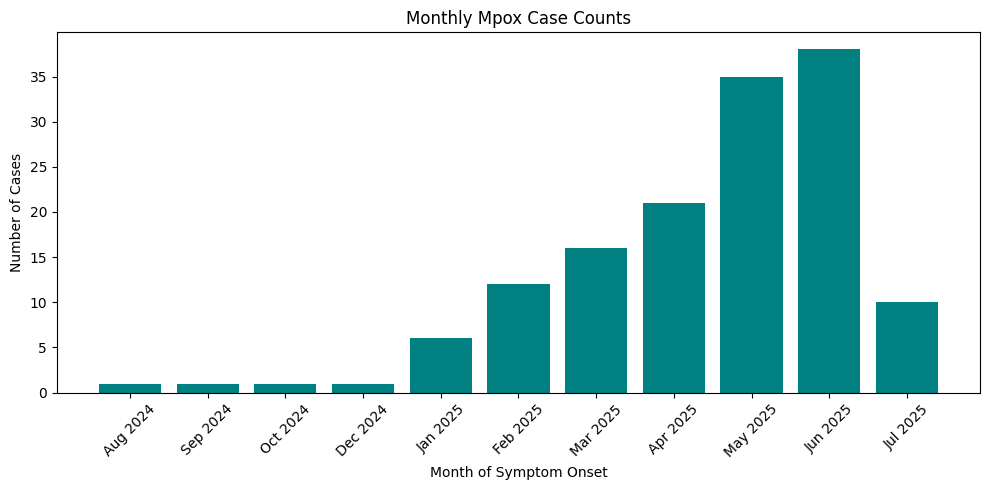

In [52]:
plt.figure(figsize=(10, 5))
plt.bar(formatted_months, monthly_case_counts.values, color='teal')
plt.title('Monthly Mpox Case Counts')
plt.xlabel('Month of Symptom Onset')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

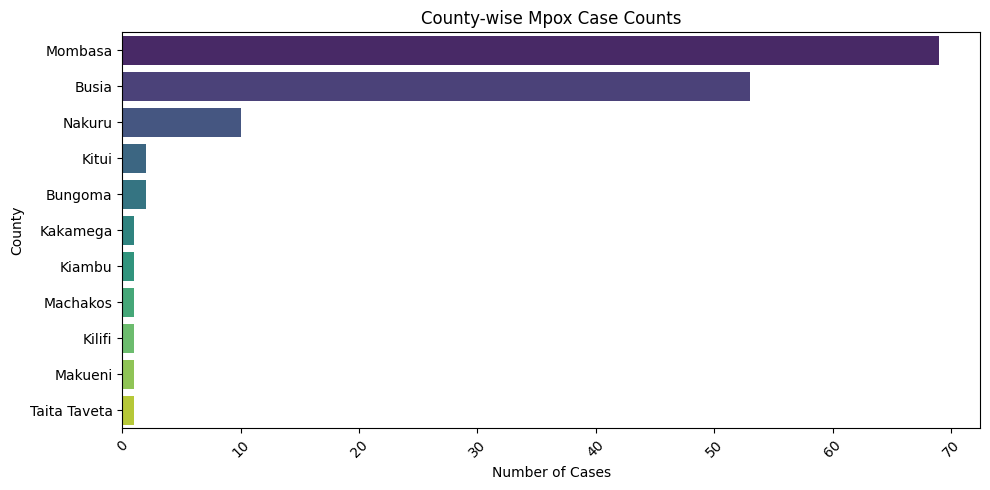

In [59]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_cleaned,y='County',order=df_cleaned['County'].value_counts().index, palette='viridis')
plt.title('County-wise Mpox Case Counts')
plt.xlabel('Number of Cases')
plt.ylabel('County')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

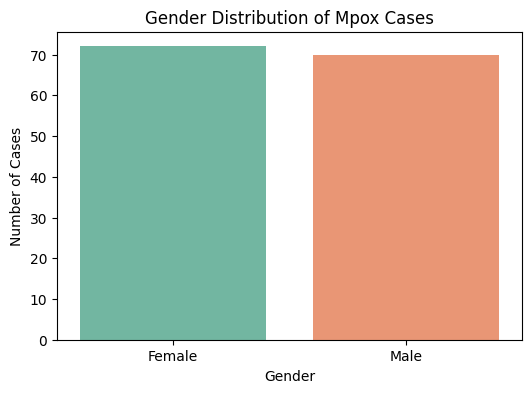

In [60]:
#gender distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df_cleaned, x='Sex', palette='Set2')
plt.title('Gender Distribution of Mpox Cases')
plt.xlabel('Gender')
plt.ylabel('Number of Cases')
plt.show()

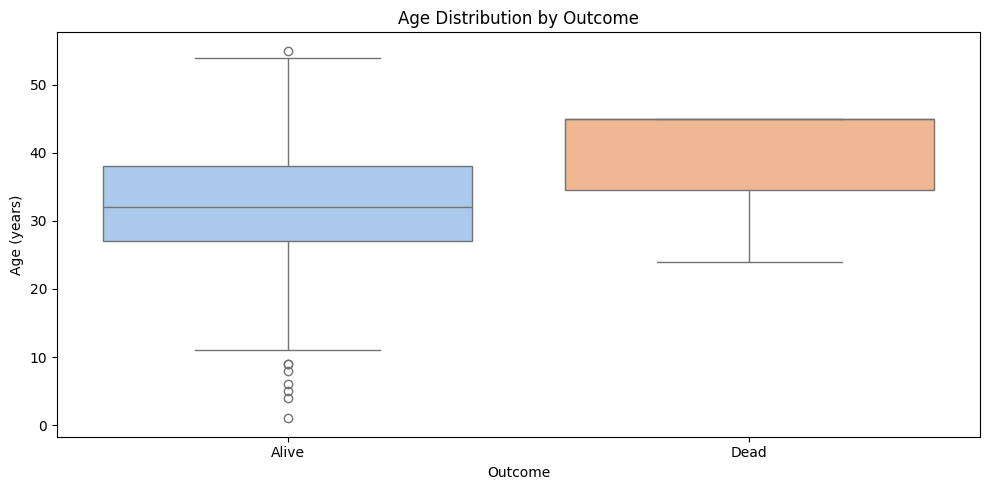

In [61]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_cleaned, x='Outcome', y='Age (years)', palette='pastel')
plt.title('Age Distribution by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Age (years)')
plt.tight_layout()
plt.show()

## Time Series Analysis

In [64]:
from prophet import Prophet

In [112]:
monthly_df = df_cleaned.groupby(pd.Grouper(key='Date of Onset', freq='M')).size().reset_index(name='cases')
monthly_df.rename(columns={'Date of Onset': 'ds','cases':'y'}, inplace=True)


model = Prophet()
model.fit(monthly_df)

future = model.make_future_dataframe(periods=36, freq='M')
forecast = model.predict(future)


#model.plot(forecast)
#plt.title("Mpox Monthly Case Forecast")
#plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb47mdj06/a85ahq3a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb47mdj06/0gf29s0l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61971', 'data', 'file=/tmp/tmpb47mdj06/a85ahq3a.json', 'init=/tmp/tmpb47mdj06/0gf29s0l.json', 'output', 'file=/tmp/tmpb47mdj06/prophet_modelf7jfg8nk/prophet_model-20250723160952.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:09:52 - cmdstanpy - INFO - Chain [1] start processing
IN

In [89]:
# Assuming df_cleaned has 'Onset_Month' as Period and 'case_count' columns
monthly_counts = df_cleaned.groupby(df_cleaned['Onset Month']).size().reset_index(name='case_count')
monthly_counts['ds'] = monthly_counts['Onset Month'].dt.to_timestamp()
monthly_counts['y'] = monthly_counts['case_count']
prophet_df = monthly_counts[['ds', 'y']]


In [90]:
# Initialize Prophet with yearly seasonality
model = Prophet(yearly_seasonality=True)
model.fit(prophet_df)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb47mdj06/9e32tw4r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb47mdj06/kc776rrs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46914', 'data', 'file=/tmp/tmpb47mdj06/9e32tw4r.json', 'init=/tmp/tmpb47mdj06/kc776rrs.json', 'output', 'file=/tmp/tmpb47mdj06/prophet_modelz8jiri_z/prophet_model-20250723152540.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:25:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:25:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

In [91]:
# Create future dataframe for 6 extra months
future = model.make_future_dataframe(periods=6, freq='M')
forecast = model.predict(future)


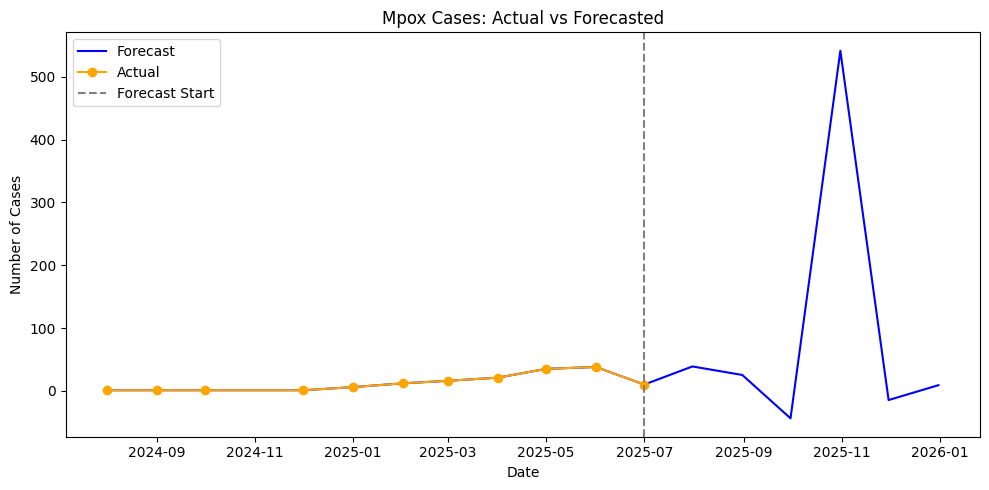

In [94]:
# Merge actual and forecast
merged = forecast[['ds', 'yhat']].merge(prophet_df, on='ds', how='left')

plt.figure(figsize=(10, 5))
plt.plot(merged['ds'], merged['yhat'], label='Forecast', color='blue')
plt.plot(merged['ds'], merged['y'], label='Actual', color='orange', marker='o')
plt.axvline(x=prophet_df['ds'].max(), color='gray', linestyle='--', label='Forecast Start')
plt.title("Mpox Cases: Actual vs Forecasted")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend()
plt.tight_layout()
plt.show()


In [85]:

county_models = {}
grouped = data.groupby('Reporting County')

for county, group in grouped:
    daily_cases_county = group.groupby('Date of Onset').size().reset_index(name='y')
    daily_cases_county.rename(columns={'Date of Onset': 'ds'}, inplace=True)

    print(f"County: {county}, Data points: {len(daily_cases_county)}")

    if len(daily_cases_county) >= 2:
        model = Prophet()
        model.fit(daily_cases_county)
        county_models[county] = model
    else:
        print(f"Skipping {county}: Not enough data.")


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb47mdj06/wpcfxnnx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb47mdj06/hi900r94.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40851', 'data', 'file=/tmp/tmpb47mdj06/wpcfxnnx.json', 'init=/tmp/tmpb47mdj06/hi900r94.json', 'output', 'file=/tmp/tmpb47mdj06/prophet_modellp702sga/prophet_model-20250723152153.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:21:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:21:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:

County: Bungoma, Data points: 1
Skipping Bungoma: Not enough data.
County: Busia, Data points: 30
County: Kitui, Data points: 1
Skipping Kitui: Not enough data.
County: Makueni, Data points: 1
Skipping Makueni: Not enough data.
County: Mombasa, Data points: 61


DEBUG:cmdstanpy:input tempfile: /tmp/tmpb47mdj06/o_5k3y9n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60789', 'data', 'file=/tmp/tmpb47mdj06/vburlebc.json', 'init=/tmp/tmpb47mdj06/o_5k3y9n.json', 'output', 'file=/tmp/tmpb47mdj06/prophet_modelhd98t0dx/prophet_model-20250723152153.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:21:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:21:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfi

County: Nakuru, Data points: 10


In [86]:
# Define forecast durations in months
future_periods_months = [3, 6, 12, 18, 24, 30, 36]
county_predictions = {}

for county, model in county_models.items():
    county_predictions[county] = {}
    for period_months in future_periods_months:
        periods_days = period_months * 30  # Approximate conversion
        future = model.make_future_dataframe(periods=periods_days, include_history=False)
        forecast = model.predict(future)
        county_predictions[county][f'{period_months}_months'] = forecast[['ds', 'yhat']]


In [87]:
# Display forecast samples for one county
for county, predictions in county_predictions.items():
    print(f"Sample Forecasts for County: {county}")
    for period, df_pred in predictions.items():
        print(f"  {period}:")
        display(df_pred.head())
    break  # Show only one county


Sample Forecasts for County: Busia
  3_months:


,ds,yhat
0,2025-07-02,1.256242
1,2025-07-03,1.665614
2,2025-07-04,1.385875
3,2025-07-05,1.139952
4,2025-07-06,1.186461


  6_months:


,ds,yhat
0,2025-07-02,1.256242
1,2025-07-03,1.665614
2,2025-07-04,1.385875
3,2025-07-05,1.139952
4,2025-07-06,1.186461


  12_months:


,ds,yhat
0,2025-07-02,1.256242
1,2025-07-03,1.665614
2,2025-07-04,1.385875
3,2025-07-05,1.139952
4,2025-07-06,1.186461


  18_months:


,ds,yhat
0,2025-07-02,1.256242
1,2025-07-03,1.665614
2,2025-07-04,1.385875
3,2025-07-05,1.139952
4,2025-07-06,1.186461


  24_months:


,ds,yhat
0,2025-07-02,1.256242
1,2025-07-03,1.665614
2,2025-07-04,1.385875
3,2025-07-05,1.139952
4,2025-07-06,1.186461


  30_months:


,ds,yhat
0,2025-07-02,1.256242
1,2025-07-03,1.665614
2,2025-07-04,1.385875
3,2025-07-05,1.139952
4,2025-07-06,1.186461


  36_months:


,ds,yhat
0,2025-07-02,1.256242
1,2025-07-03,1.665614
2,2025-07-04,1.385875
3,2025-07-05,1.139952
4,2025-07-06,1.186461


## Predicted Cases for the next 3,6,8,12 Months

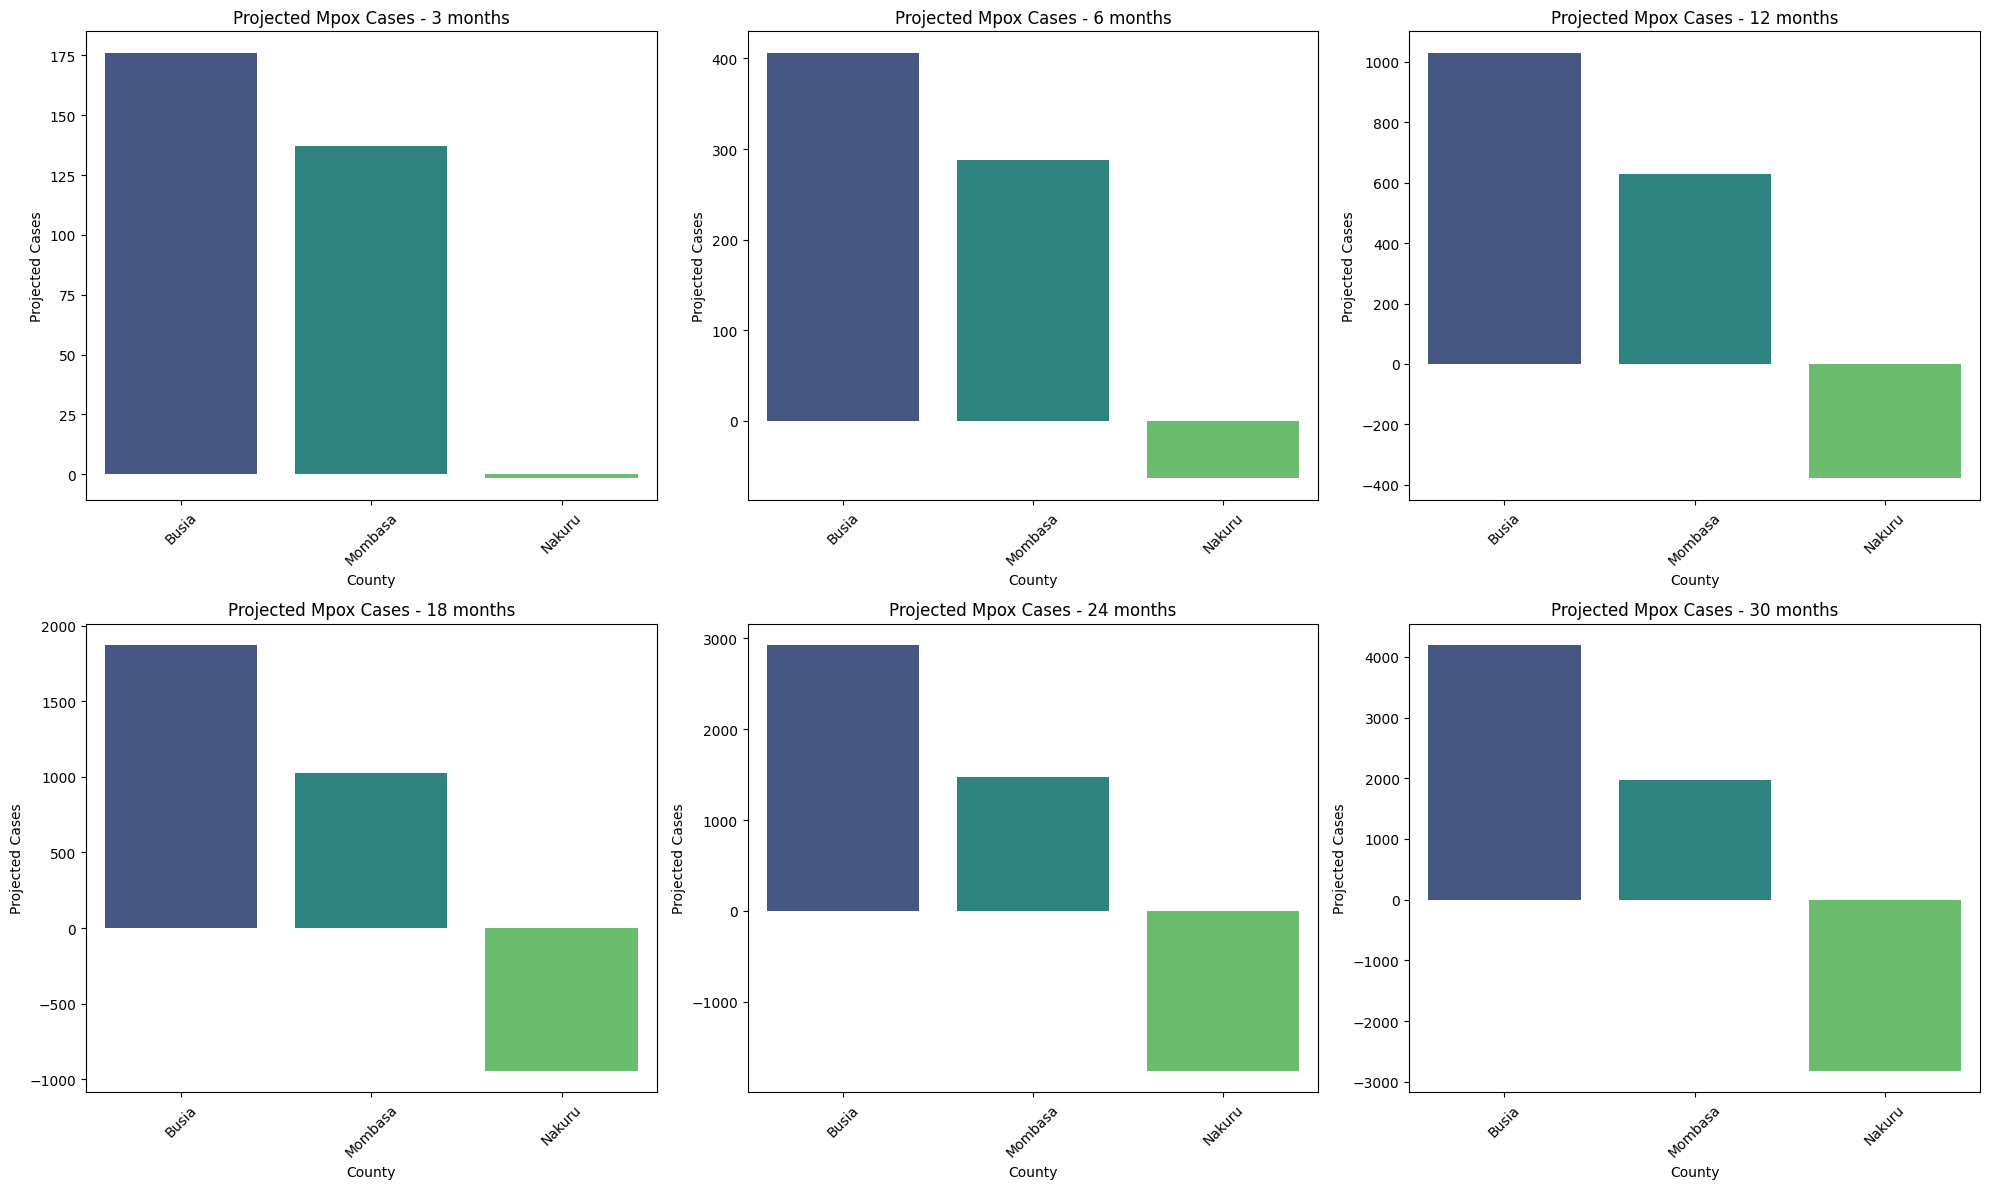

In [110]:

# Define your analysis periods
future_periods_months = [3, 6, 12, 18, 24, 30]
periods = [f"{m}_months" for m in future_periods_months]

# Initialize 2x3 subplots for 6 periods
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for idx, period in enumerate(periods):
    projected_cases = []

    for county, preds in county_predictions.items():
        if period in preds and not preds[period].empty:
            if 'yhat' in preds[period].columns:
                total_cases = preds[period]['yhat'].sum()
                projected_cases.append({
                    'County': county,
                    'Projected Cases': total_cases
                })

    # Convert to DataFrame
    projected_df = pd.DataFrame(projected_cases)

    if not projected_df.empty:
        projected_df = projected_df.sort_values(by='Projected Cases', ascending=False)
        sns.barplot(x='County', y='Projected Cases', data=projected_df, ax=axes[idx], palette='viridis')
        axes[idx].set_title(f'Projected Mpox Cases - {period.replace("_", " ")}')
        axes[idx].tick_params(axis='x', rotation=45)
    else:
        axes[idx].set_title(f'No data for {period}')
        axes[idx].axis('off')

# In case you have fewer than 6 periods, hide the unused subplots
for j in range(len(periods), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## County Mapping

In [72]:
# Load county shapefile
kenya_map = gpd.read_file('/content/kenya.geojson')  # adjust this path as needed

# Check the column names
print("Columns in the GeoDataFrame:")
print(kenya_map.columns)

Columns in the GeoDataFrame:
Index(['OBJECTID', 'ID_', 'COUNTY_NAM', 'CONST_CODE', 'CONSTITUEN',
       'COUNTY_COD', 'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')


In [73]:
kenya_map['County'] = kenya_map['COUNTY_NAM'].str.upper().str.strip()

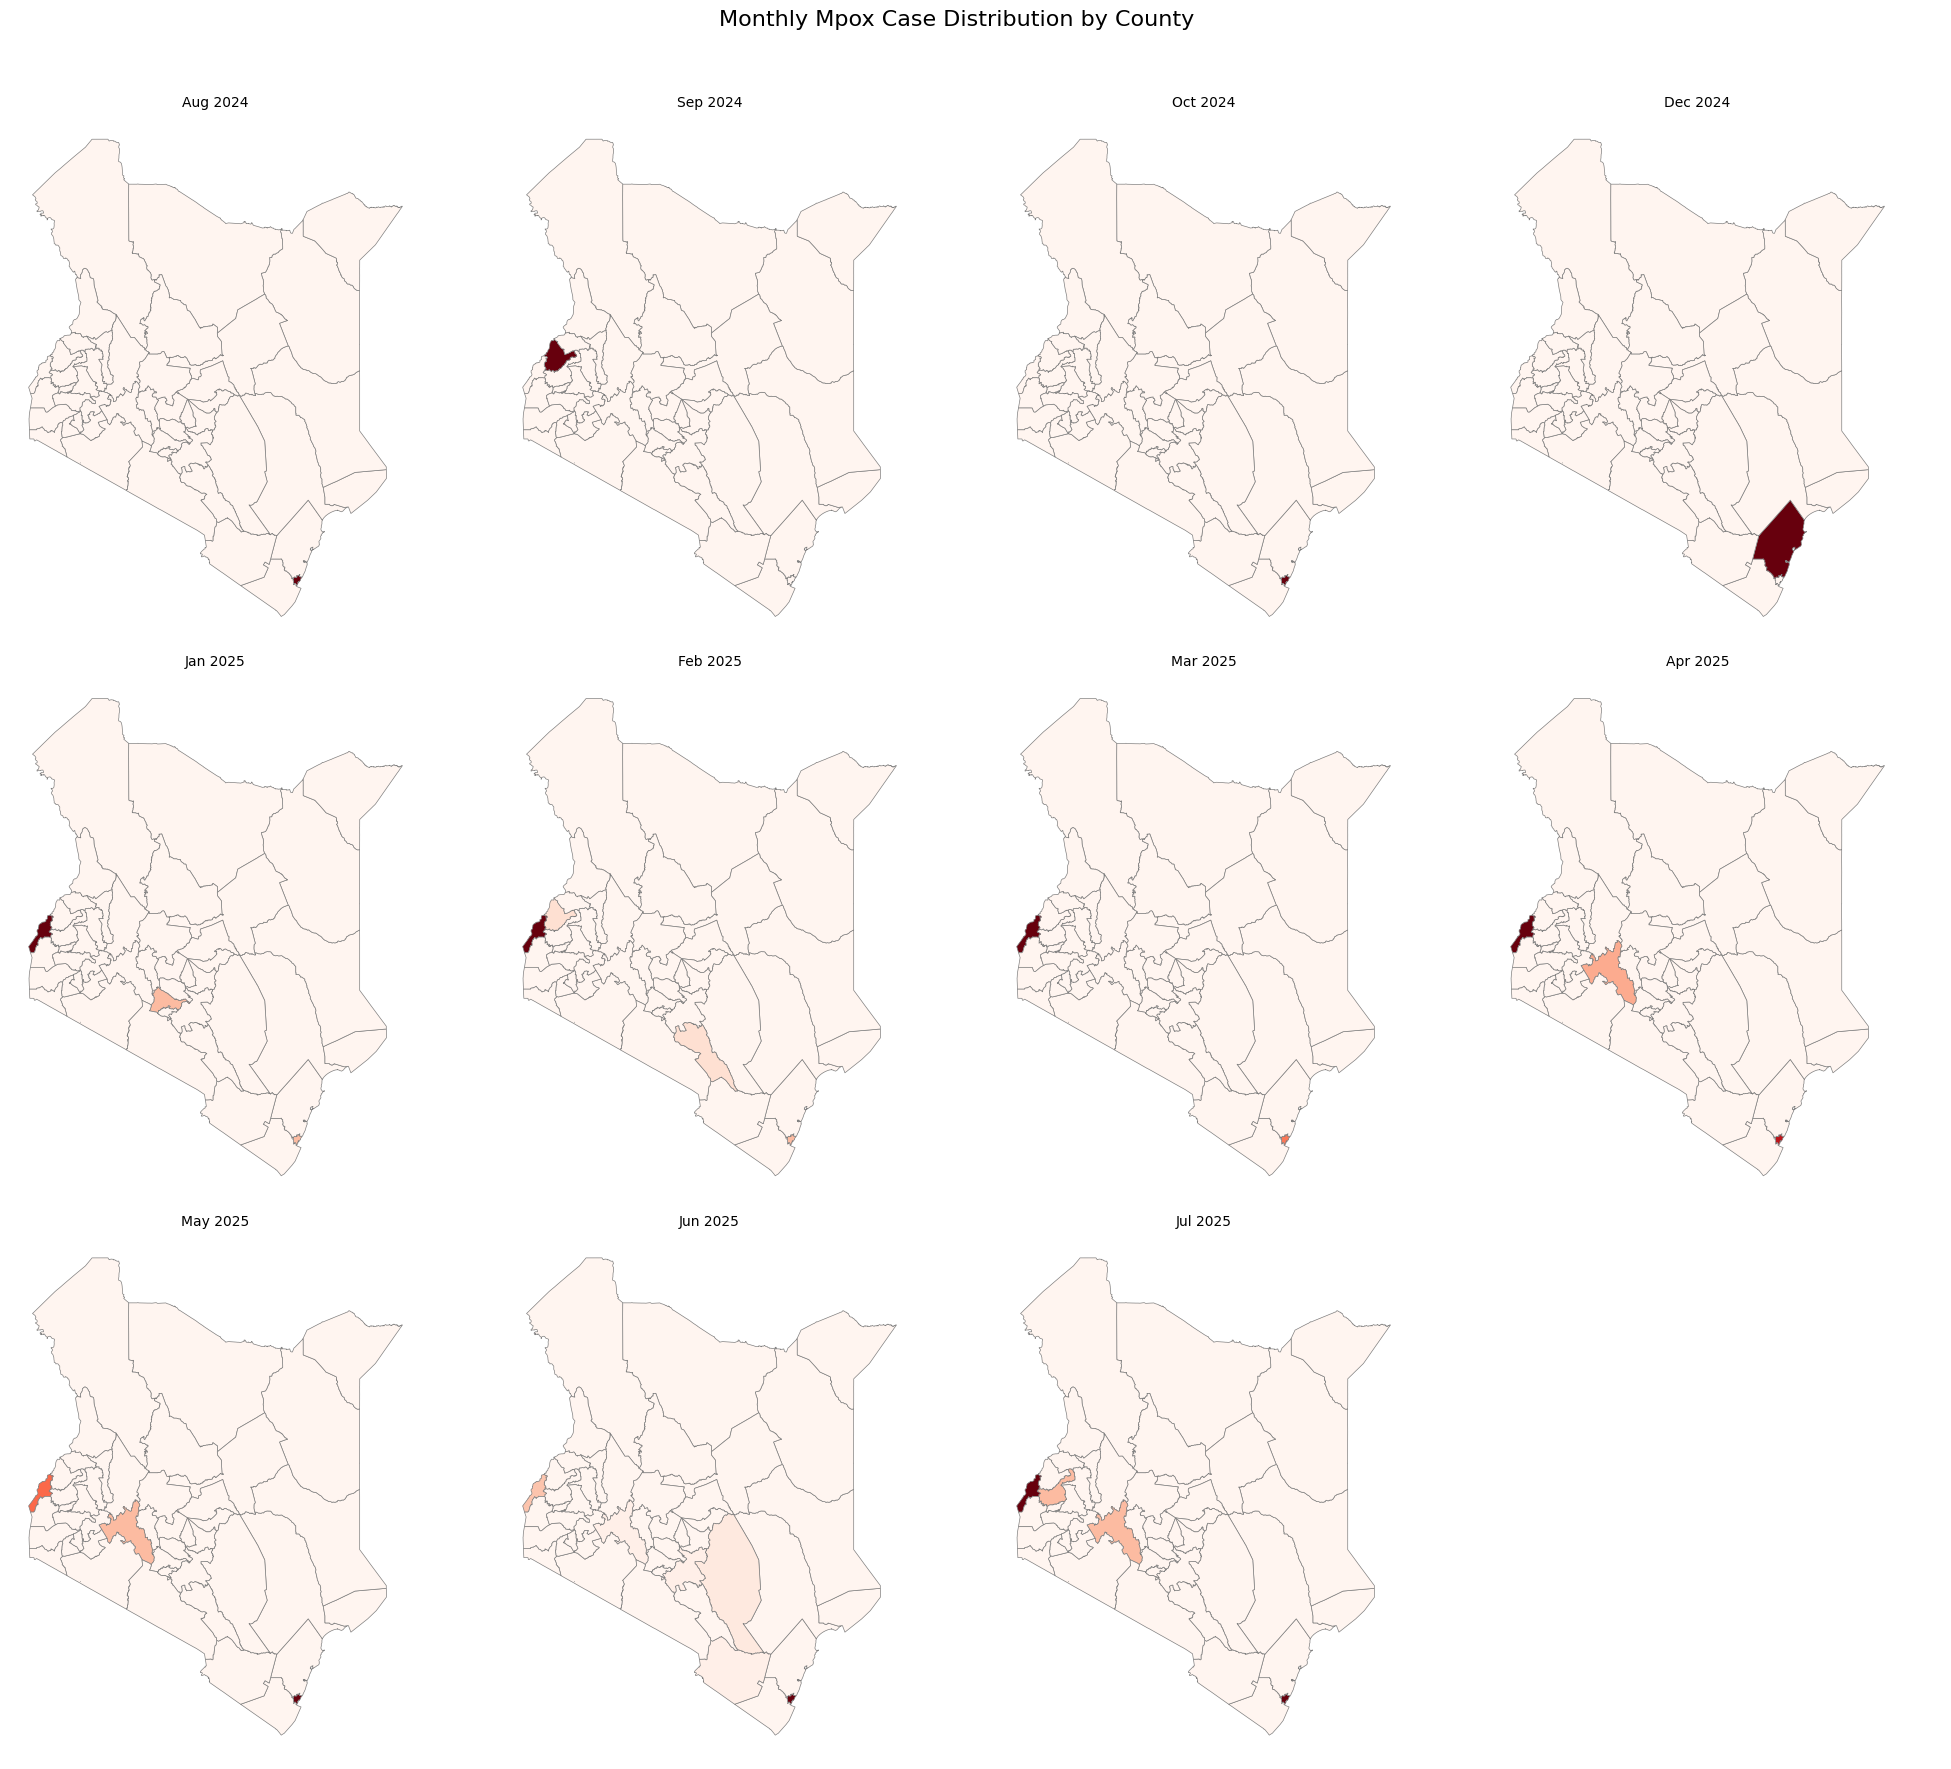

In [76]:

# Ensure months are sorted
unique_months = sorted(monthly_geo_cases['Onset_Month'].unique())

# Set number of rows and columns for the grid
n_cols = 4
n_rows = (len(unique_months) + n_cols - 1) // n_cols  # Ceiling division

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 6 * n_rows))
axes = axes.flatten()  # Flatten to 1D for easy indexing

for idx, month in enumerate(unique_months):
    ax = axes[idx]

    # Filter data for the current month
    df_month = monthly_geo_cases[monthly_geo_cases['Onset_Month'] == month]

    # Merge with map
    map_month = kenya_map.merge(df_month, on='County', how='left')
    map_month['case_count'] = map_month['case_count'].fillna(0)

    # Plot the map
    map_month.plot(column='case_count', cmap='Reds', linewidth=0.5, edgecolor='0.5',
                   legend=False, ax=ax)

    ax.set_title(f'{month.strftime("%b %Y")}', fontsize=10)
    ax.axis('off')

# Hide unused subplots if total < n_rows * n_cols
for i in range(len(unique_months), len(axes)):
    axes[i].axis('off')

plt.suptitle('Monthly Mpox Case Distribution by County', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
